In [ ]:
# Para manipulacao dos dados
import pandas as pd
import numpy as np

# para graficos
import seaborn as sns
import matplotlib.pyplot as plt
!pip install sweetviz
import sweetviz as sv


# para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#### Settings ####
pd.set_option("max_colwidth", 1000)
pd.set_option("max_rows", 20)
pd.set_option("max_columns", 1000)
pd.set_option("precision", 2)
pd.options.display.float_format = "{:,.2f}".format
plt.style.use("classic")
# %load_ext nb_black

     |████████████████████████████████| 15.1 MB 5.1 MB/s 


# **2. PRIMEIRAS IMPRESSÕES**

In [ ]:
# Carregar Dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/german_credit_data.csv", index_col= 0)#, sep=';', decimal= ',' ) 

In [ ]:
# Ver as primeiras linhas

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
# Ver as ultimas linhas
df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [ ]:
# Ver Qualquer quantidade de linahs no final ou inicio

# df.head(20)
# df.tail(20)


In [ ]:
# Informação das variaveis ex:( tipos, valores nulos, memoria que o onjeto ta consumido, etc.)

df.info() # Ver variaveis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
# Comos aber o numero de colunas e linhas

df.shape

# Criar nova linha de codigo Ctrl + M B

(1000, 10)

In [ ]:
# f-string

print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset possui 1000 linhas e 10 colunas


In [ ]:
# Como acessar os valores de Shape.
df.shape[1]

10

In [ ]:
# Usar f-string dentro de Quarys

"""
import pandasql as ps

filtro_idade = 70
quary = f"""
# select = from df
# where age < {filtro_idade} 
"""

ps.sqldf(query, locals())"""

'\n\nps.sqldf(query, locals())'

In [ ]:
# Acessar elementos: loc e iloc

df.iloc[0:4, 0:7] # acessando intervalo linha 0 a 3, e coluna 0 a 7


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount
0,67,male,2,own,NaN,little,1169
1,22,female,2,own,little,moderate,5951
2,49,male,1,own,little,NaN,2096
3,45,male,2,free,little,little,7882


In [ ]:
# Outras formas de acessar elementos, usando nome da coluna

df.loc[0:3, "Age"]

0    67
1    22
2    49
3    45
Name: Age, dtype: int64

In [ ]:
# Se quiser trazer mais de uma coluna

df.loc[0:3, ['Age', 'Sex', 'Job']] 

# lembrar de adicionar [] a uma lista se for mais de uma coluna

,Age,Sex,Job
0,67,male,2
1,22,female,2
2,49,male,1
3,45,male,2


In [ ]:
# Acessar pelo nome da coluna como indice

novo_dataframe = df[["Age", "Housing"]]
novo_dataframe.head()

,Age,Housing
0,67,own
1,22,own
2,49,own
3,45,free
4,53,free


In [ ]:
# Estatistica Descritiva // IMPORTANTE

df.describe()

# Média de duração = 20,90
# Desvio padrão = 4,00 á 72,00
# Maximo de idade = 75 anos
# Minimo de diade = 18 anos

,Age,Job,Credit amount,Duration
count,"1,000.00","1,000.00","1,000.00","1,000.00"
mean,35.55,1.90,"3,271.26",20.90
std,11.38,0.65,"2,822.74",12.06
min,19.00,0.00,250.00,4.00
25%,27.00,2.00,"1,365.50",12.00
50%,33.00,2.00,"2,319.50",18.00
75%,42.00,2.00,"3,972.25",24.00
max,75.00,3.00,"18,424.00",72.00


In [ ]:
# Estatistica descritiva por grupo

df.groupby('Sex')[['Age', 'Credit amount', 'Duration']].mean()

# Cria duas colunas de Sexo Masculino e Feminino, por as demais colunas. // max/ min/ med

,Age,Credit amount,Duration
Sex,,,
female,32.80,"2,877.77",19.44
male,36.78,"3,448.04",21.56


In [ ]:
# Estatistica por grupo por motivo

df.groupby('Purpose')[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Purpose,,,
business,35.48,"4,158.04",26.94
car,37.14,"3,768.19",20.81
domestic appliances,34.25,"1,498.00",16.83
education,38.29,"2,879.20",19.68
furniture/equipment,32.46,"3,066.99",19.29
radio/TV,34.70,"2,487.65",20.05
repairs,38.55,"2,728.09",19.09
vacation/others,39.92,"8,209.33",32.33


In [ ]:
# Dados que estão faltando na tabela // Missing

df.isna()

# IMPORTANTE AVALIAR O DATASET com muitos missings


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,True,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,True,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Total de missing por coluna // Missings Ex

df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
# Media de dados faltantes por coluna Ex

df.isna().mean() # Caso queira preencher, poderia usar fillna()

# Usar fillna() apenas depois de teste e treino para evitar erro.

Age                0.00
Sex                0.00
Job                0.00
Housing            0.00
Saving accounts    0.18
Checking account   0.39
Credit amount      0.00
Duration           0.00
Purpose            0.00
Risk               0.00
dtype: float64

In [ ]:
# Encontrar variaveis(colunas) categoricas

df.Housing.value_counts() # conta quantidade por cada tipo de valor

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [ ]:
# Encontrar categoria por sexo Ex

df.Sex.value_counts() # Mais homens que mulheres

male      690
female    310
Name: Sex, dtype: int64

In [ ]:
# Encontrar categoria por percentual

df.Sex.value_counts(normalize=True).sort_index() * 100

female   31.00
male     69.00
Name: Sex, dtype: float64

In [ ]:
# Trazer todos os nomes das colunas

df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
# Filtrar(Query para Lógica)

df.query('Age > 70') # filtra  todos os individuos com 70 anos

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
186,74,female,3,free,little,moderate,5129,9,car,bad
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
536,75,female,3,own,NaN,little,1374,6,car,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


In [ ]:
# Filtrar com dois parametros

homens_idosos = df.query('Age > 70 & Sex == "male" ' ) # Criando um novo dataframe
homens_idosos.head()

# cuidado com letras maiusculas e minusculas, porque mudam totalmente o grafico

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


In [ ]:
# Método para tentar inferir se a variavel é categorica

provavel_categorica = {}

for var in df.columns:
  provavel_categorica[var] = 1.0 * df[var].nunique()/df[var].count() < 0.03
provavel_categorica # mostra o que é categorico.

# IMPORTANTE PARA DATASETS MUITO GRANDES.
# Essa verificação mostra a quantidade de varivaeis dentro de uma coluna
# Se for menor que 5 e  interessante usar para a modelagem
# Se não será preciso ser feito de outra forma.

{'Age': False,
 'Checking account': True,
 'Credit amount': False,
 'Duration': False,
 'Housing': True,
 'Job': True,
 'Purpose': True,
 'Risk': True,
 'Saving accounts': True,
 'Sex': True}

In [ ]:
# Dataset que irá ser usado no modelo.

df['Risco_cliente'] = np.where(df['Risk'] == "bad", 1, 0) # Cria coluna
df.drop('Risk', axis=1, inplace=True) # Dropa coluna // inplace torna  permanente
df.head()

# Condição de Verdadeiro ou Falso

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risco_cliente
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [ ]:
# Ver porcentagem

df.Risco_cliente.value_counts(normalize=True) * 100


0   70.00
1   30.00
Name: Risco_cliente, dtype: float64

**3. Análise Exploratória**

PLOT COM PANDAS

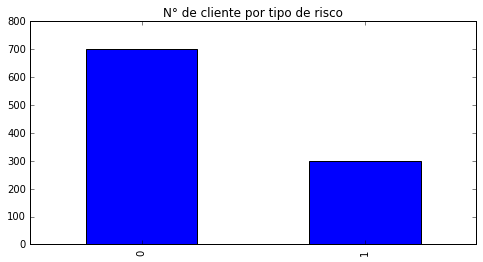

In [ ]:
# Mostrando grafico com dados do pandas no matplotlib

_ = plt.figure(figsize=(8, 4)) # largura e altura das barras
_ = df.Risco_cliente.value_counts().plot(kind='bar') # Colcoando dados em grafico de barras.
_ = plt.title('N° de cliente por tipo de risco') # Titulo
_ = plt.ylim(0, 800) # Altura e largura

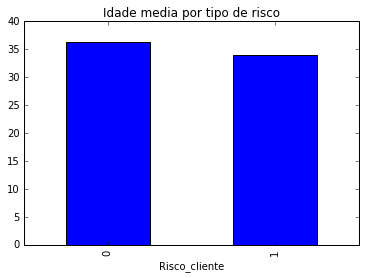

In [ ]:
# Media de risco por idade

_ = df.groupby('Risco_cliente')['Age'].mean().plot(kind='bar')
_ = plt.title('Idade media por tipo de risco')

**PLOT COM MATPLOTLIB ( FOCO NA HIERARQUIA)**

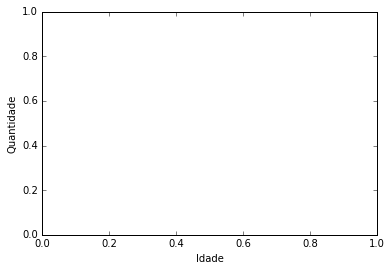

In [ ]:
# GRAFICO SENDO CONSTRUIDO POR PARTES

_= plt.figure(figsize=(6, 4)) # Criando a imagem que vai receber o grafico
_ = plt.xlabel('Idade') # Constuindo eixo x
_= plt.ylabel('Quantidade') # Construindo eixo y

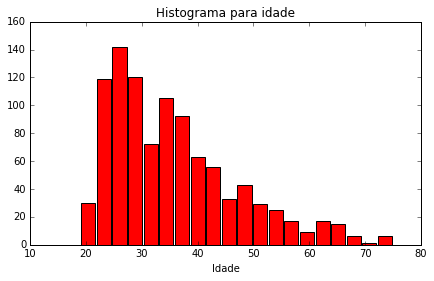

In [ ]:
# Adicionando elementos na figura

_ = plt.figure(figsize=(7,4)) # Criando a imagem que vai receber o grafico
_ = plt.hist(data=df,x='Age', bins=20, rwidth=0.9, color='Red') # Histograma / Dataset / dados em X / Tamanho do retanguilo / largura do retangulo / Colocar cor
_ = plt.xlabel('Idade') # Nome do eixo X
_ = plt.title('Histograma para idade') # Titulo do grafico

# _ = plt.ylabel('')
# Pode ser adicionado a tabela seguindo padrão de x

**PLOT COM SEABORN**

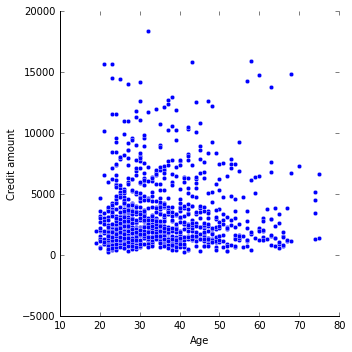

In [ ]:
_ = sns.relplot(x='Age', y = 'Credit amount', data=df) # Montar grafico / eixo X / eixo Y / dataset

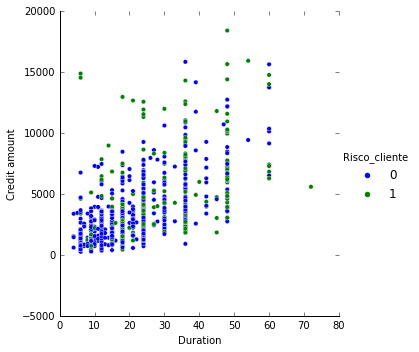

In [ ]:
# Relação de credito e montante por Risco de cliente

_ = sns.relplot(x='Duration', # Montar grafico / eixo X
                y = 'Credit amount', # eixo Y
                hue='Risco_cliente', # mudar cor de acordo com a variação do dado
                data=df) # dataset

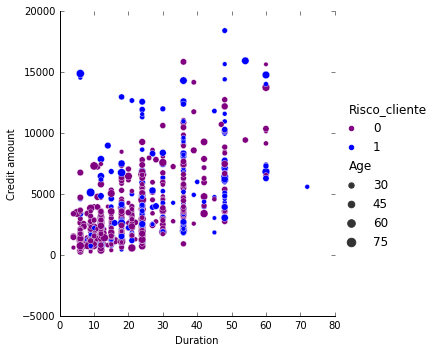

In [ ]:
# Como adicionar uma plaeta de cores e o tamanho dos dados

_ = sns.relplot(x='Duration', 
                y = 'Credit amount', 
                hue='Risco_cliente', 
                palette=['purple', 'blue'], # Paleta de cores no grafico
                size='Age', # aumenta tamanho de acordo com a idade
                data=df) 

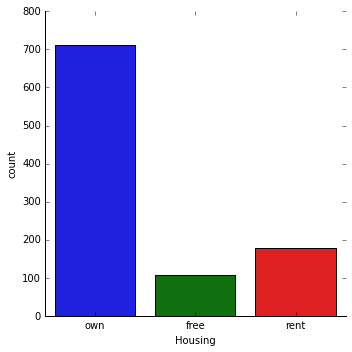

In [ ]:
# Grafico de contagem por Categoria

_ = sns.catplot(x='Housing', kind='count', data=df) # usando grafico categorico

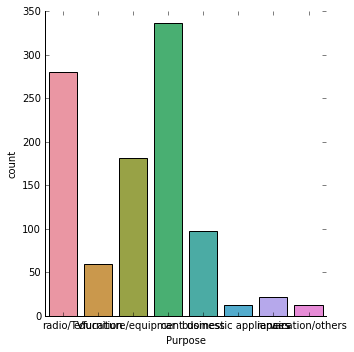

In [ ]:
# Grafico de contagem por Categoria Ex: 2

_ = sns.catplot(x='Purpose', kind='count', data=df)

# espere

**DASHBOARD AUTOMATIZADO**

In [ ]:
# Dashboard com duas linhas / Usando SWEETVIZ

reporte = sv.analyze(df) # Fazer analise do grafico
reporte.show_html()

# Para abrir o arquivo SWEETVIZ_REPORT procure nos arquivo a direita.
# Se clicar em um grafico ele trava

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## **## 4. MODELAGEM DE MACHINE LEARNING: RANDOM FOREST**

In [ ]:
# lISTANDO AS COLUNA DE DADOS QUE IREMOS SUAR

features = ['Age', 'Job', 'Credit amount', 'Purpose', 'Housing', 'Duration']
target = 'Risco_cliente'

In [ ]:
# Divisão mde dados para treinamento

from sklearn.model_selection import train_test_split # separar por treino e teste

X = df[features] # colunas de treino
y = df[target] # Colunas de teste

# função de treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state = 999
)
# teste_size = 25%(Será separado em uma porcentagem, nesse caso) // Random entre 999

In [ ]:
# Tratando as variaveis categoricas (cuidado quando for numerica)

cat_features = ['Job', 'Housing', 'Purpose'] # Categorica
num_features = ['Age', 'Credit amount', 'Duration'] # nuemricas

In [ ]:
# Instalar o pacote de transformação de categoria em binario

!pip install category_encoders
import category_encoders as ce # Transforma colunas categoricas em binarias

encoder = ce.OneHotEncoder(cols=cat_features) # Como transformar

X_train = encoder.fit_transform(X_train) 
# Fazendo tratamento para treinar a rede neural

X_train.head() # Ver base do treino

     |████████████████████████████████| 82 kB 392 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
314,29,1,0,0,0,1494,1,0,0,0,0,0,0,0,1,0,0,4
941,31,1,0,0,0,1546,1,0,0,0,0,0,0,0,1,0,0,10
992,23,1,0,0,0,1936,0,1,0,0,0,0,0,0,0,1,0,18
515,37,0,1,0,0,609,1,0,0,0,0,0,0,0,1,0,0,6
31,27,0,1,0,0,4020,0,0,1,0,0,0,0,0,1,0,0,24


In [ ]:
# aplicando trataemntopara teste na rede neural e como ver

X_test = encoder.transform(X_test)

X_test.head() # Visualizar

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
842,23,0,1,0,0,1943,0,0,0,0,0,0,1,0,1,0,0,18
68,37,0,1,0,0,1819,0,0,0,0,1,0,0,0,0,0,1,36
308,24,0,1,0,0,1237,0,0,1,0,0,0,0,0,1,0,0,8
881,48,0,1,0,0,9277,1,0,0,0,0,0,0,0,0,0,1,24
350,23,0,1,0,0,1236,0,0,0,0,0,1,0,0,0,1,0,9


In [ ]:
# Treinando a rede neural

clf_RF = RandomForestClassifier() # Cria o objeto
clf_RF.fit(X_train, y_train) # Aplica o treino nas variaveis

RandomForestClassifier()

RandomForestClassifier()


In [ ]:
# Aplciar o teste

y_pred = clf_RF.predict(X_test) # Executando o teste

y_pred # Mostrar resultado do teste

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Porcentagem de acertos no codigo

from sklearn.metrics import accuracy_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # quantidade de acertos do codigo

from sklearn.metrics import f1_score

print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 0.676
F1 Score: 0.319327731092437


In [ ]:
from sklearn.metrics import confusion_matrix

print("Matriz de Confusão : \n" + str(confusion_matrix(y_test, y_pred))) # Mostrar a matrix de cunfusão, com acertos e erros

Matriz de Confusão : 
[[300  36]
 [126  38]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Positive: " + str(tp)) # Verdadeiro positivo
print("True Negative: " + str(tn)) # Verdadeiro Negativo
print("False Positive: " + str(fp)) # Falso positivo
print("False Negative: " + str(fn)) # Falso Negativo

True Positive: 38
True Negative: 300
False Positive: 36
False Negative: 126


In [ ]:
tp / (tp + 27)

0.5846153846153846

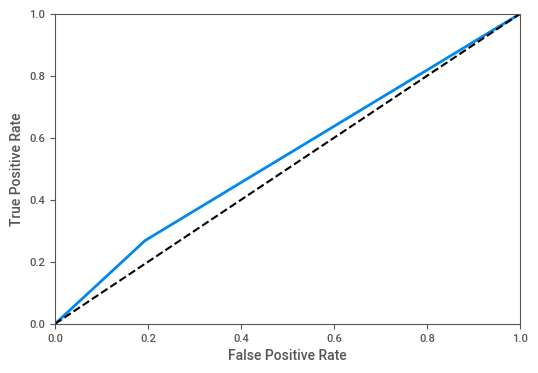

In [ ]:
# CURVA ROC: calcula fpr e tpr para vários limiares, Verificar a quantidade ce acertos e erros.
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)

In [ ]:
clf_RF.feature_importances_

array([0.23779566, 0.02564421, 0.02647573, 0.02089376, 0.00453284,
       0.30993694, 0.03237402, 0.0245569 , 0.01831194, 0.01693338,
       0.0179573 , 0.00882156, 0.00917989, 0.00391021, 0.02077602,
       0.01646932, 0.01399647, 0.19143386])

In [ ]:
#  Importancia das colunas
feature_imp = pd.Series(clf_RF.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp

Credit amount   0.31
Age             0.24
Duration        0.19
Purpose_1       0.03
Job_2           0.03
Job_1           0.03
Purpose_2       0.02
Job_3           0.02
Housing_1       0.02
Purpose_3       0.02
Purpose_5       0.02
Purpose_4       0.02
Housing_2       0.02
Housing_3       0.01
Purpose_7       0.01
Purpose_6       0.01
Job_4           0.00
Purpose_8       0.00
dtype: float64

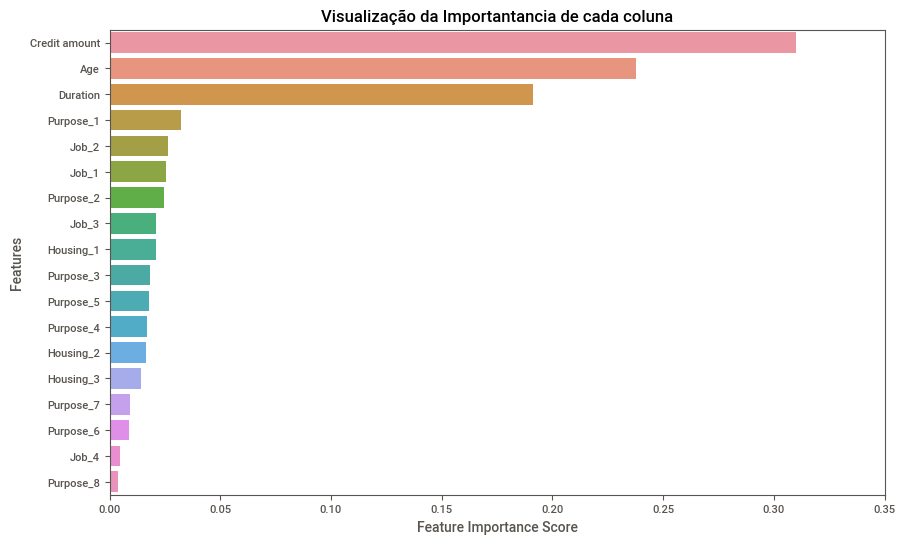

In [ ]:
# Creating a bar plot // Visualizar a imporancia de cada coluna dentro da rede neural.
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualização da Importantancia de cada coluna")
_ = plt.savefig("rf_features.png")

In [ ]:
# Melhorando os modelos das arvores de decisão

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

# Tunando os hiperparâmetros:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    "n_estimators": randint(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    "min_samples_split": uniform(0.01, 0.199),
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1) # aplicando 100 vezes para encontrar o melhor resultado de treino

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint

pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.27496017185730115,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.056119934439745334,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 49,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Qual combinação de parâmetros trouxe melhor resultado:
model.best_estimator_

RandomForestClassifier(max_features=0.27496017185730115,
                       min_samples_split=0.056119934439745334, n_estimators=49)

In [ ]:
# Aplciando treino e teste com os melhores resultados

clf_random = RandomForestClassifier(
    max_features=0.3124639258611636,
    min_samples_split=0.05068599769657197,
    n_estimators=160,
)

clf_random.fit(X_train, y_train)

RandomForestClassifier(max_features=0.3124639258611636,
                       min_samples_split=0.05068599769657197, n_estimators=160)

In [ ]:
# Nova taxa de acerto da arvore de decisão // analise a previsão se manteve em 67 % devido a base ser pequena

y_pred_random = clf_random.predict(X_test)

print("Acurácia: " + str(accuracy_score(y_test, y_pred_random)))

print("F1 Score: {}".format(f1_score(y_test, y_pred_random)))

Acurácia: 0.676
F1 Score: 0.13829787234042554
